# Predicting Thyroid Cancer Relapse Using Machine Learning

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/Users/vishwanathreddy/Downloads/Projects-2/thyroid_cancer/dataset.csv'  
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
# Encode categorical variables
df_cleaned = df.copy()
label_encoders = {}

for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])
        label_encoders[column] = le

In [4]:
# Split features and target
X = df_cleaned.drop('Recurred', axis=1)
y = df_cleaned['Recurred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)

Model Accuracy: 98.70%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



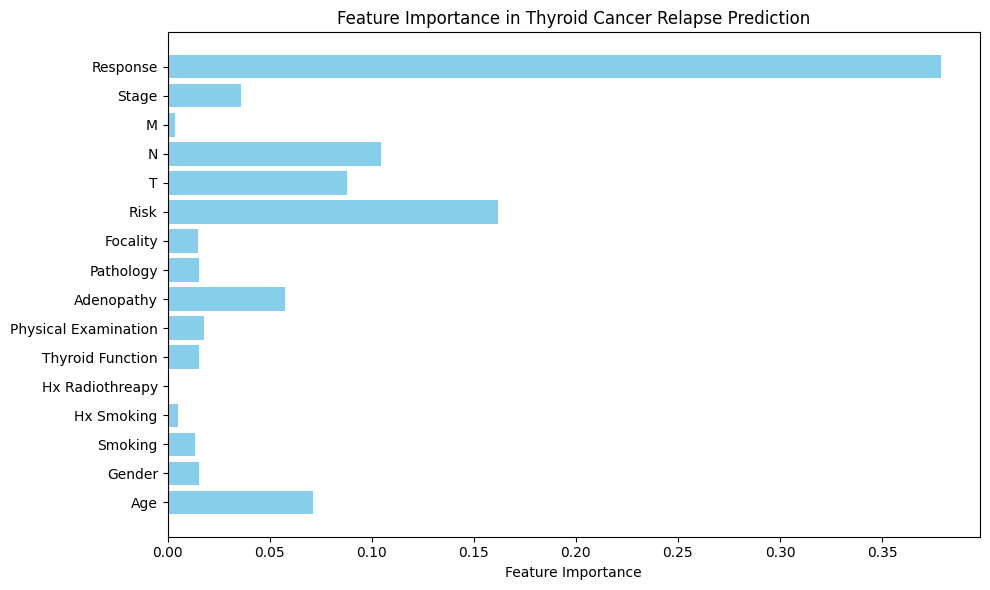

In [7]:
# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Thyroid Cancer Relapse Prediction")
plt.tight_layout()
plt.show()